<a href="https://colab.research.google.com/github/Mar1yam/Machine-Learning-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Customer Churn in Telecom Industry Using Machine Learning**
-- Mariyam Member - 100867858

---



Upload Telco Customer Churn Dataset by Blastchar


[Telco Customer Churn by Blastchar - Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Read the Telco Customer Churn Dataset that was uploaded

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

- Clean the dataset by replacing the spaces with NaN
- Drop missing values
- Remove customerID because its not really neeed

In [ ]:
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)
df.drop(['customerID'], axis=1, inplace=True)

Encode all categorical columns using LabelEncoder to convert text into numbers

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

Split data into features (X) and target (y), then into training and test sets

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

For better model performance we will standerdize the feature values to have mean 0 and variance 1

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We will define and train 4 machine learning models:
1. Regression
2. Random Forest
3. SVM
4. XGBoost

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


We will use Keras as a deep learning model to compare with traditional ML models

In [ ]:
model_dl = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
# Compile the model with binary crossentropy loss and Adam optimizer.
model_dl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model on the scaled training data.
model_dl.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)
# Predict and evaluate performance.
y_pred_dl = model_dl.predict(X_test_scaled).flatten()
y_pred_label = (y_pred_dl > 0.5).astype(int)
results["Deep Learning"] = {
    "Accuracy": accuracy_score(y_test, y_pred_label),
    "Precision": precision_score(y_test, y_pred_label),
    "Recall": recall_score(y_test, y_pred_label),
    "F1 Score": f1_score(y_test, y_pred_label),
    "ROC AUC": roc_auc_score(y_test, y_pred_dl),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_label)
}

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7180 - loss: 0.5476
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7823 - loss: 0.4414
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7948 - loss: 0.4335
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7964 - loss: 0.4180
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4331
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4260
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4184
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.4159
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7975 - loss: 0.4124
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 0.4020
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7966 - loss: 0.4168
Epoch 12/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

Display final evaluation results for all the models

In [ ]:
pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Confusion Matrix
Logistic Regression,0.788913,0.633218,0.489305,0.552036,0.830094,"[[927, 106], [191, 183]]"
Random Forest,0.787491,0.638376,0.462567,0.536434,0.815505,"[[935, 98], [201, 173]]"
SVM,0.793888,0.673554,0.435829,0.529221,0.789107,"[[954, 79], [211, 163]]"
XGBoost,0.771855,0.587459,0.475936,0.525849,0.806079,"[[908, 125], [196, 178]]"
Deep Learning,0.802416,0.671429,0.502674,0.574924,0.828463,"[[941, 92], [186, 188]]"


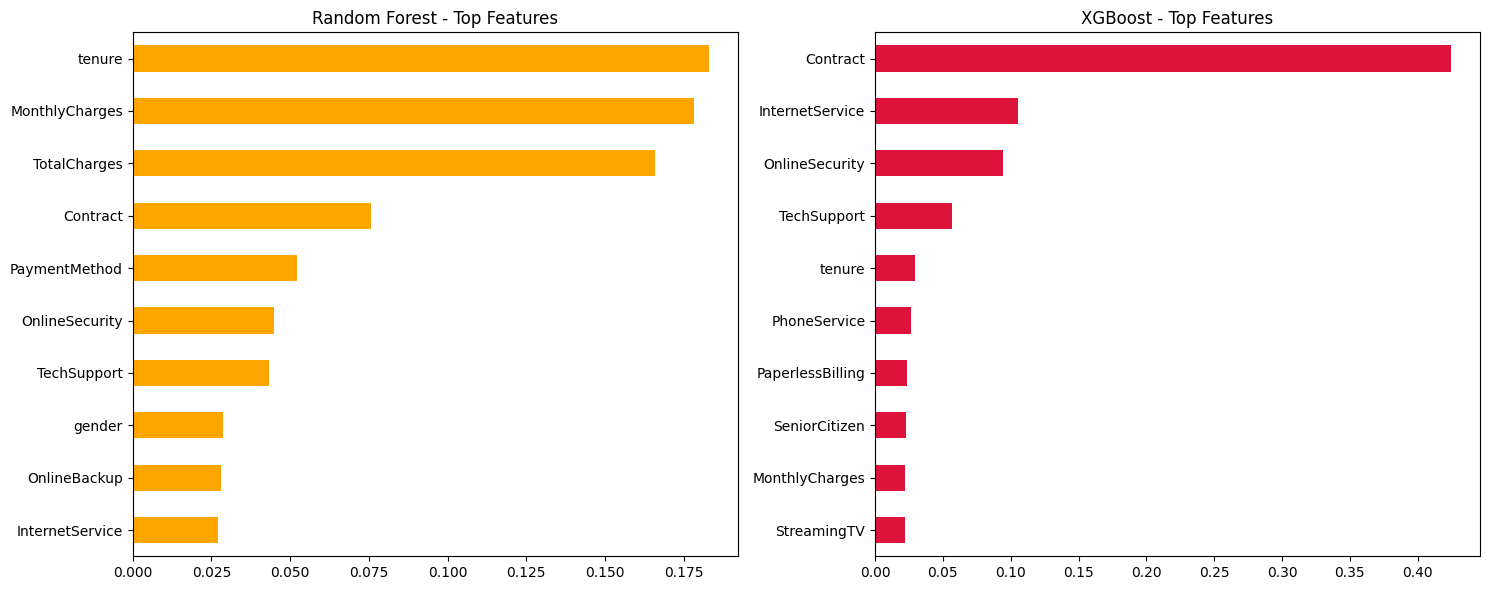

In [ ]:
# Random Forest feature importance
rf_importance = pd.Series(models["Random Forest"].feature_importances_, index=X.columns)
rf_top10 = rf_importance.sort_values(ascending=False).head(10)

# XGBoost feature importance
xgb_importance = pd.Series(models["XGBoost"].feature_importances_, index=X.columns)
xgb_top10 = xgb_importance.sort_values(ascending=False).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

rf_top10.plot(kind='barh', ax=axes[0], title="Random Forest - Top Features", color='orange')
axes[0].invert_yaxis()

xgb_top10.plot(kind='barh', ax=axes[1], title="XGBoost - Top Features", color='crimson')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()